In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
import splitfolders
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Viewing the Data

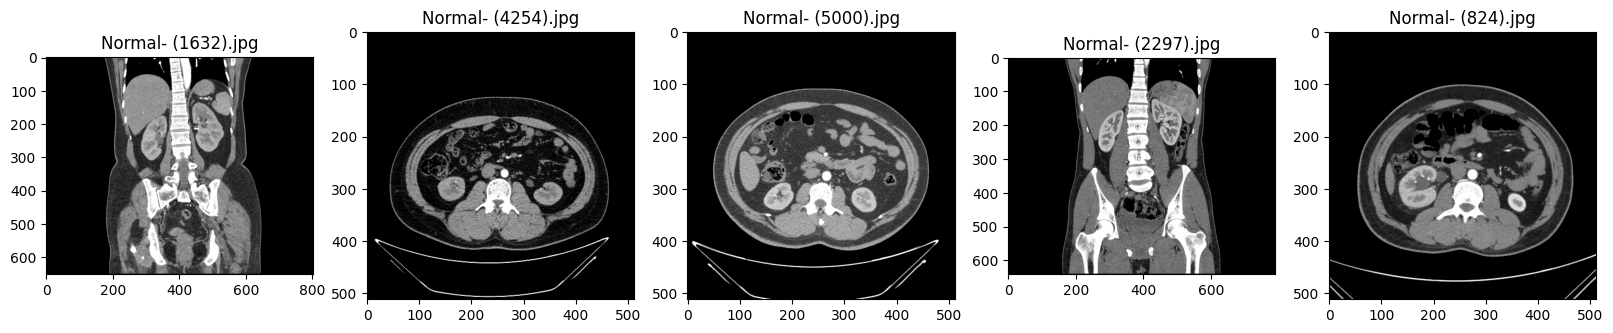

In [3]:
# Viewing Sample Normal Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

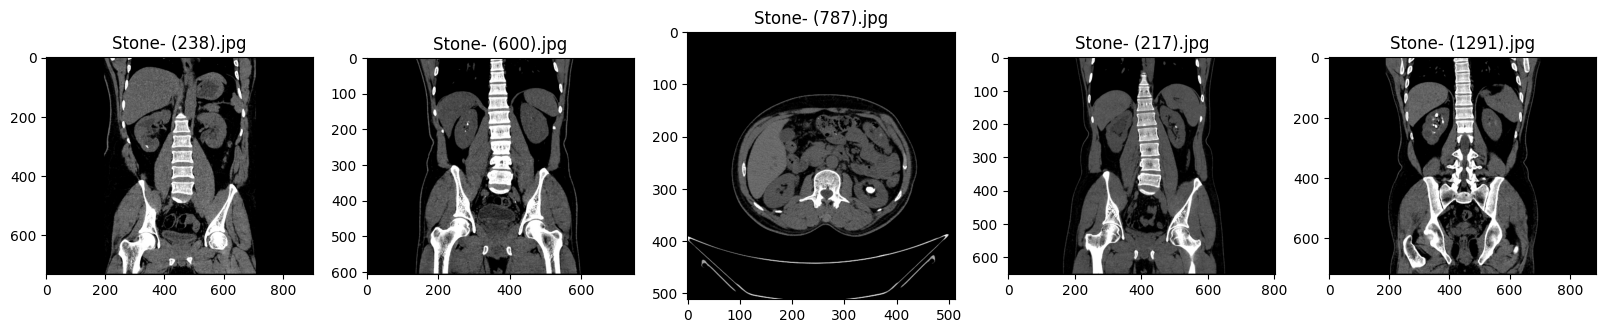

In [4]:
# Viewing Sample Stone Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

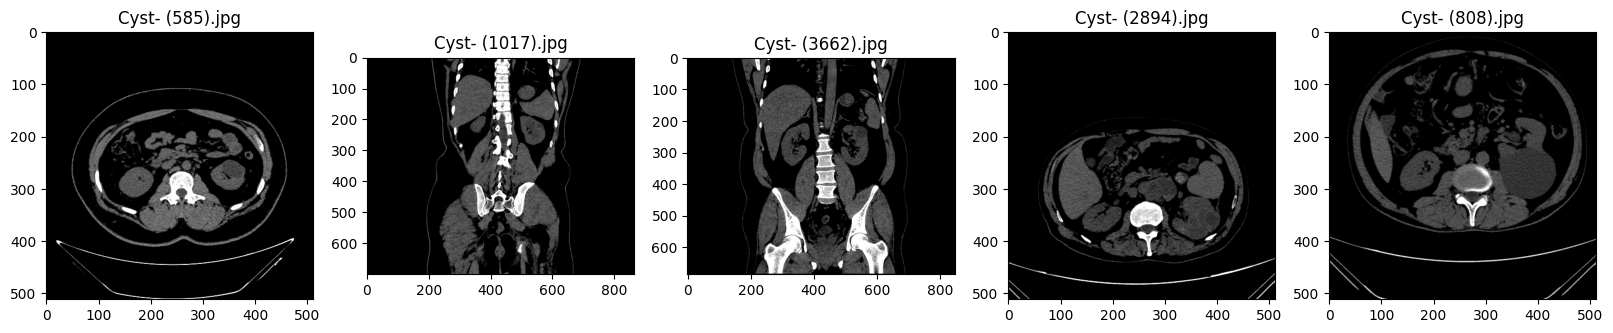

In [5]:
# Viewing Sample Cyst Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

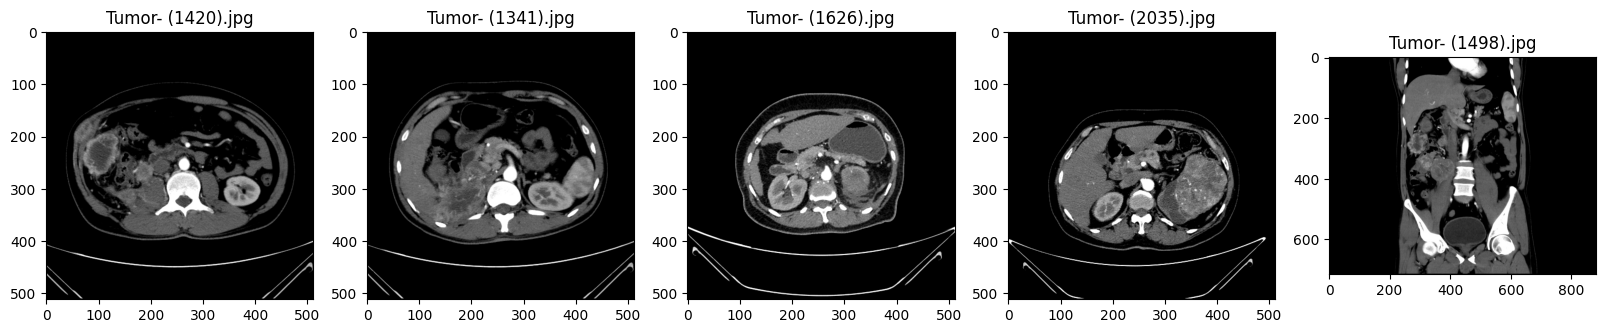

In [6]:
# Viewing Sample Tumor Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [9]:
# Making directories for augmented data
os.makedirs('/kaggle/working/Data')
os.makedirs('/kaggle/working/Data/Normal')
os.makedirs('/kaggle/working/Data/Stone')
os.makedirs('/kaggle/working/Data/Cyst')
os.makedirs('/kaggle/working/Data/Tumor')

In [10]:
# import shutil
# shutil.rmtree("/kaggle/working/Data")

In [11]:
# Augmenting and Storing Normal Kidney Images
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Normal',
                          save_prefix='Normal',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [ ]:
# Augmenting and Storing Kidney Stone Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Stone',
                          save_prefix='Stone',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [13]:
# Augmenting and Storing Kidney Cyst Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Cyst',
                          save_prefix='Cyst',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [14]:
# Augmenting and Storing Kidney Tumor Images
datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))
import numpy as np
import os
from PIL import Image
image_directory = r'/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/'
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):    
    if (image_name.split('.')[1] == 'jpg'):        
        image = io.imread(image_directory + image_name)        
        image = Image.fromarray(image, 'RGB')        
        image = image.resize((SIZE,SIZE)) 
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= r'/kaggle/working/Data/Tumor',
                          save_prefix='Tumor',
                          save_format='jpg'):    
    i += 1    
    if i > 500:        
        break

In [ ]:
# from PIL import Image, ImageFilter, ImageOps
# import cv2

# inPath = r'/kaggle/working/Data/'

# for folderPath in os.listdir(inPath):
#     tempPath = os.path.join(inPath, folderPath)
#     for imagePath in os.listdir(tempPath):
#         inputPath = os.path.join(tempPath, imagePath)
        
#         img = Image.open(inputPath)
#         filtered_img = img.filter(ImageFilter.UnsharpMask(radius = 4, percent = 500, threshold = 8))
#         cv2.imwrite(inputPath,np.array(filtered_img))

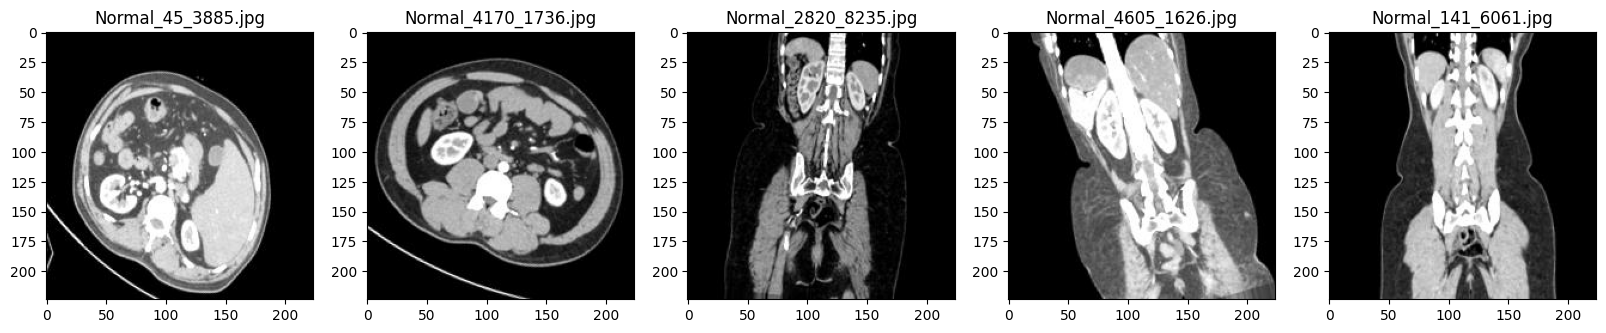

In [ ]:
# Viewing Sample Normal Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Normal'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

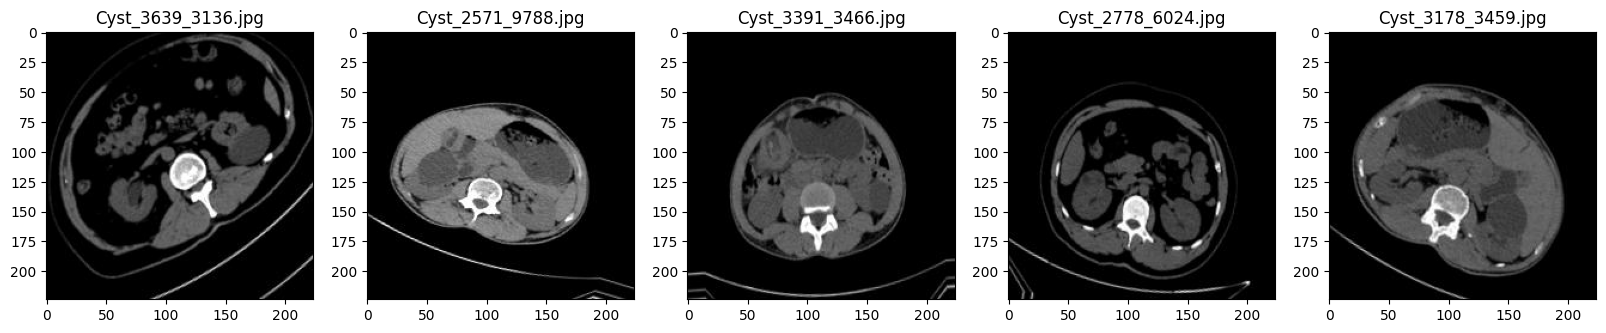

In [ ]:
# Viewing Sample Cyst Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Cyst'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

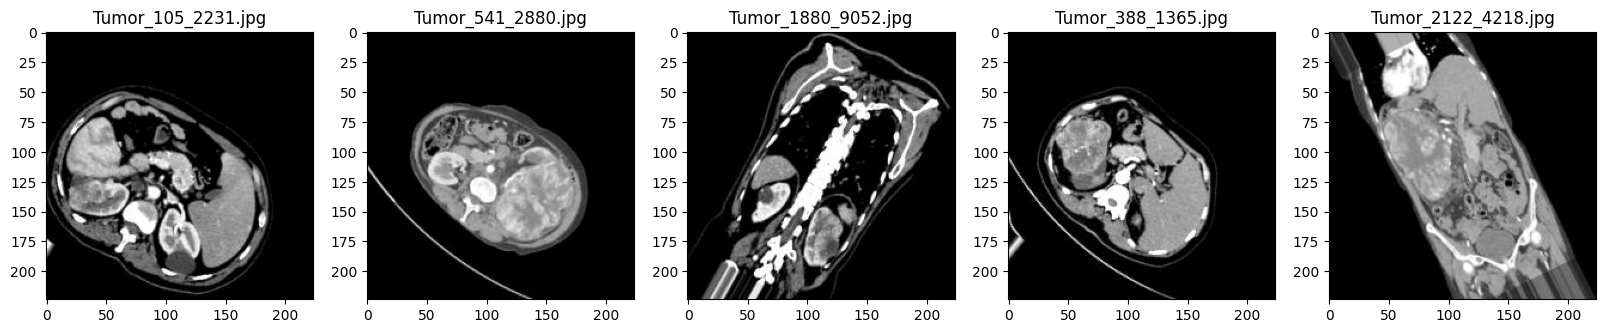

In [ ]:
# Viewing Sample Tumor Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Tumor'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

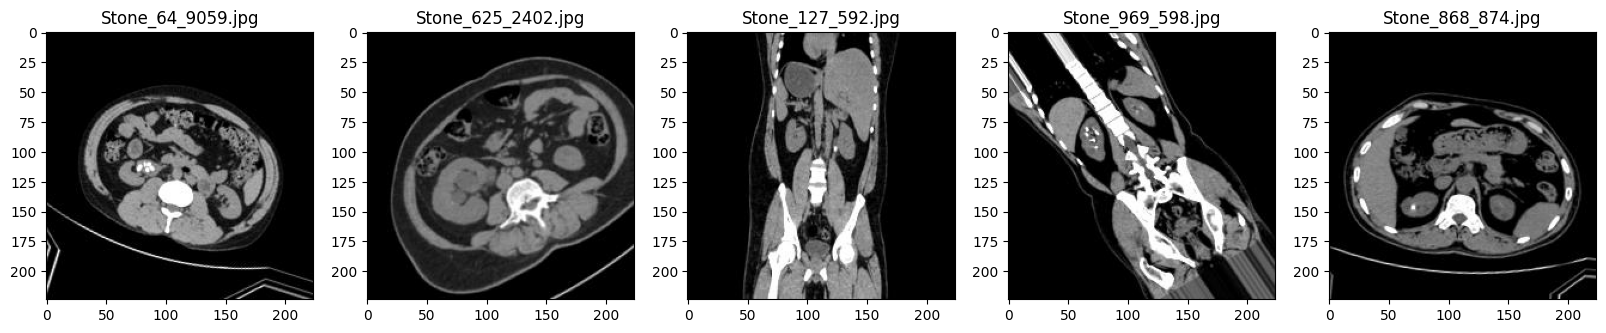

In [ ]:
# Viewing Sample Stone Data
plt.figure(figsize=(20,20))
test_folder=r'/kaggle/working/Data/Stone'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [23]:
model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

In [24]:
splitfolders.ratio(r"/kaggle/working/Data", output=r"/kaggle/working/output/",
    seed=336, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 31952 files [00:05, 5785.08 files/s]


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
train_data_dir = r'/kaggle/working/output/train/'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    class_mode="categorical",
    target_size = (224, 224))

val_data_dir = r'/kaggle/working/output/val/'
validation_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (224, 224),
    class_mode="categorical")

test_data_dir = r'/kaggle/working/output/test/'
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    shuffle=False,
    target_size = (224, 224),
    class_mode="categorical")

Found 51114 images belonging to 4 classes.
Found 6386 images belonging to 4 classes.
Found 6395 images belonging to 4 classes.


In [26]:
model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 50,
            callbacks=[callback],
            batch_size = 128)

Epoch 1/50
1598/1598 [==============================] - 213s 126ms/step - loss: 0.6510 - accuracy: 0.7252 - val_loss: 0.2832 - val_accuracy: 0.9150
Epoch 2/50
1598/1598 [==============================] - 201s 126ms/step - loss: 0.2979 - accuracy: 0.9055 - val_loss: 0.2160 - val_accuracy: 0.9317
Epoch 3/50
1598/1598 [==============================] - 221s 139ms/step - loss: 0.2204 - accuracy: 0.9295 - val_loss: 0.1245 - val_accuracy: 0.9615
Epoch 4/50
1598/1598 [==============================] - 201s 125ms/step - loss: 0.1916 - accuracy: 0.9378 - val_loss: 0.1130 - val_accuracy: 0.9659
Epoch 5/50
1598/1598 [==============================] - 200s 125ms/step - loss: 0.1747 - accuracy: 0.9446 - val_loss: 0.1406 - val_accuracy: 0.9648
Epoch 6/50
1598/1598 [==============================] - 200s 125ms/step - loss: 0.1799 - accuracy: 0.9428 - val_loss: 0.1627 - val_accuracy: 0.9601
Epoch 7/50
1598/1598 [==============================] - 200s 125ms/step - loss: 0.1374 - accuracy: 0.9547 - val_

In [ ]:
score = model.evaluate(test_generator, verbose=0)

In [ ]:
#Test accuracy
score

[0.05797317996621132, 0.9823299646377563]

In [ ]:
from sklearn.metrics import classification_report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(test_generator.classes, y_pred, target_names=list(train_generator.class_indices.keys())))

200/200 [==============================] - 22s 103ms/step
              precision    recall  f1-score   support

        Cyst       0.98      0.99      0.98      1603
      Normal       0.98      0.98      0.98      1602
       Stone       0.98      0.97      0.98      1589
       Tumor       0.99      0.99      0.99      1601

    accuracy                           0.98      6395
   macro avg       0.98      0.98      0.98      6395
weighted avg       0.98      0.98      0.98      6395



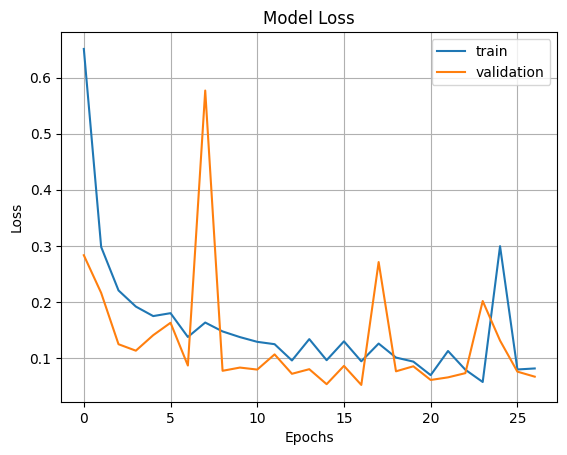

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

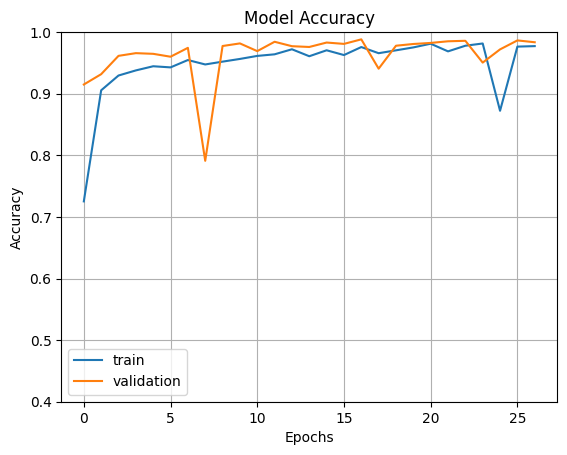

In [ ]:
# Evaluating the model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

ROC AUC score: 0.9882054371835408


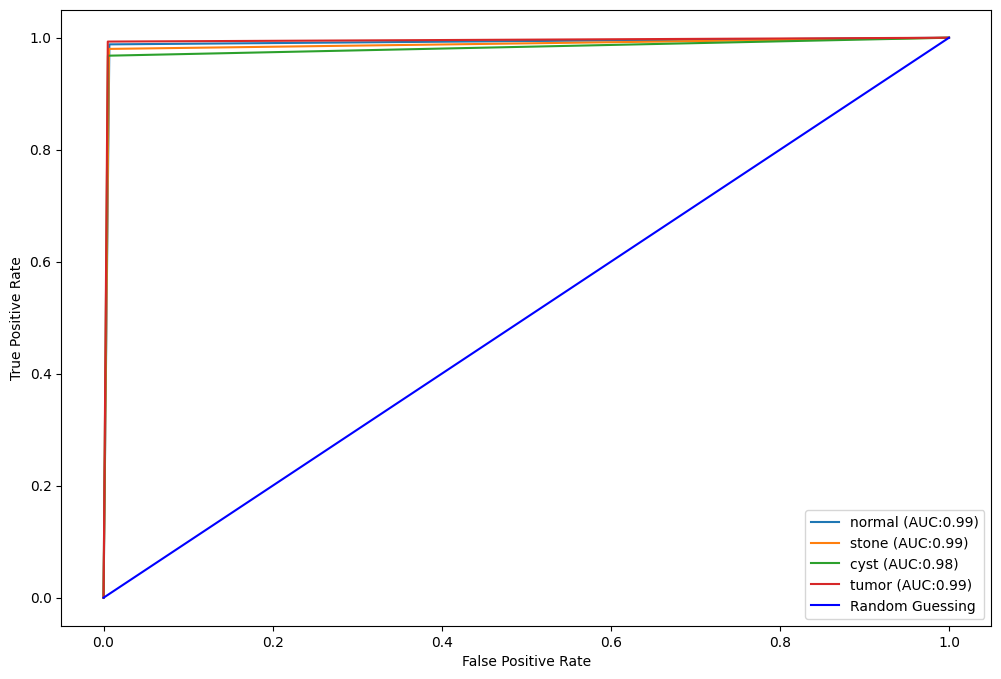

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['normal', 'stone', 'cyst', 'tumor']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_generator.classes, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
import gradio as gr
class_names = ['Cyst','Normal','Stone','Tumor']
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=4)
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://e50bd7308e794d570a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 35ms/step


In [36]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 51.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 6.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=1bd33b9efcd9c1b4ca050441d756b01d61c7f8a84722b420357c50dcc57e7be1
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.3.5
    Uninstalling mdit-py-plugins-0.3.5:
      Successfully uninstalled mdit-py-plugins-0.3.5


In [ ]:
# import visualkeras
# from visualkeras import layered_view
# from PIL import ImageFont
# from tensorflow.keras.layers import Flatten, Dense, Dropout
# from tensorflow.keras import Model
# from tensorflow.keras.applications.resnet50 import ResNet50
# resnet_model = ResNet50()

# font = ImageFont.truetype('/kaggle/input/arial-font/arial.ttf', 150)
# layered_view(resnet_model, legend=True, font=font, spacing=15, type_ignore=[Dropout, Flatten, visualkeras.SpacingDummyLayer])

In [ ]:
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)